# Data loading

In [74]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv 
marketing = pd.read_csv("C:/Users/11468/Downloads/marketing.csv",
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [29]:
# Print the first five rows of the DataFrame
print(marketing.head(5))

# Print the statistics of all columns
print(marketing.describe())

# Check column data types and non-missing values
print(marketing.info())

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel is_retained  DoW  
0           NaT           House Ads        True  0.0  
1           

In [30]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')
marketing['converted'] = marketing['converted'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


In [31]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

print(marketing.head(5))
print(marketing.info())

      user_id date_served marketing_channel          variant  converted  \
0  a100000029  2018-01-01         House Ads  personalization       True   
1  a100000030  2018-01-01         House Ads  personalization       True   
2  a100000031  2018-01-01         House Ads  personalization       True   
3  a100000032  2018-01-01         House Ads  personalization       True   
4  a100000033  2018-01-01         House Ads  personalization       True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel  is_retained  DoW  channel_code  \
0           NaT           House Ads         T

# Exploratory Analysis & Summary Statistics

## 1. Basic marketing metrics

### 1) Calculating conversion rate

In [32]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()
print(total)

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()
print(subscribers)

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

7309
1030
14.09 %


### 2) Calculating retention rate

In [48]:
# Data clean
marketing.loc[marketing['converted']==False,'is_retained']=False

# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()
print(total_subscribers)

# Calculate the number of people who remained subscribed
retained = marketing[(marketing['is_retained'] == True) ]['user_id'].nunique()
print(retained)

# Calculate the retention rate
retention_rate = retained/total_subscribers

print(round(retention_rate*100, 2), "%")

1030
696
67.57 %


## 2. Comparing language conversion rate

### 1) Calculate conversion rate 

#### (1）Only for English

In [49]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 13.13 %


#### (2) For all languages

In [50]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


### 2) Visualize conversion rate by language

NameError: name 'plt' is not defined

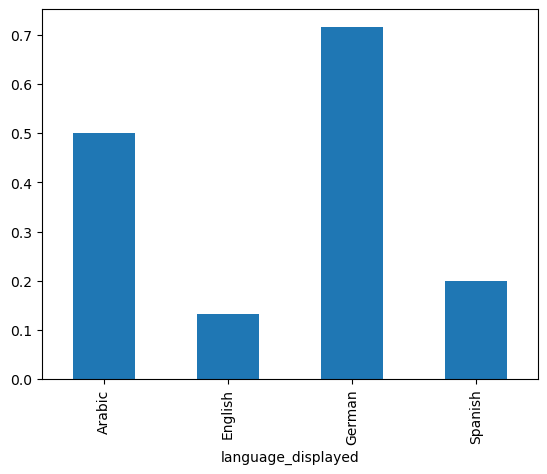

In [52]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Language', size = 14)

# Display the plot
plt.show()

## 3.Comparing daily conversion rate

### 1) Calculate the conversion rate

#### (1) Calculation

In [51]:
# Group by date_served and count unique users
total = marketing.groupby('date_served')\
['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']==True]\
.groupby('date_served')\
['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


#### (2) Creating daily conversion rate DataFrame

In [54]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total
print(daily_conversion_rates )

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


### 2) Visalization

####  (1) Setting up our data to visualize daily conversion

In [59]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                                 'conversion_rate']

print(daily_conversion_rate.head())
print(daily_conversion_rate.info())

  date_served  conversion_rate
0  2018-01-01         0.099448
1  2018-01-02         0.098930
2  2018-01-03         0.103448
3  2018-01-04         0.108359
4  2018-01-05         0.125392
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_served      31 non-null     datetime64[ns]
 1   conversion_rate  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes
None


#### (2) Visaluzation

NameError: name 'plt' is not defined

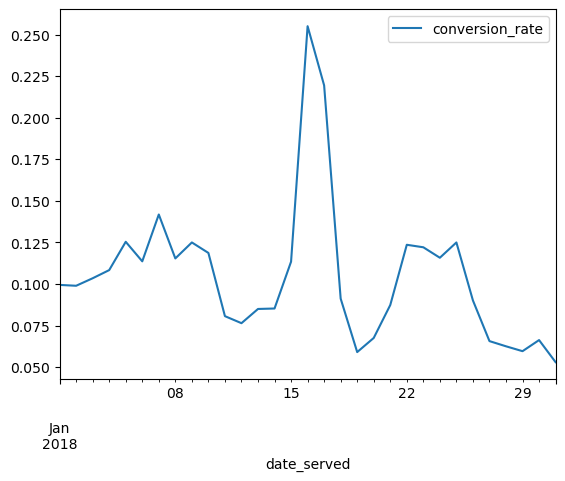

In [60]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

## 4. Marketing channels across age groups

### 1) Marketing channels are reaching all users equally?

<class 'pandas.core.series.Series'>
MultiIndex: 35 entries, ('Email', '0-18 years') to ('Push', '55+ years')
Series name: user_id
Non-Null Count  Dtype
--------------  -----
35 non-null     int64
dtypes: int64(1)
memory usage: 570.0+ bytes
None


NameError: name 'plt' is not defined

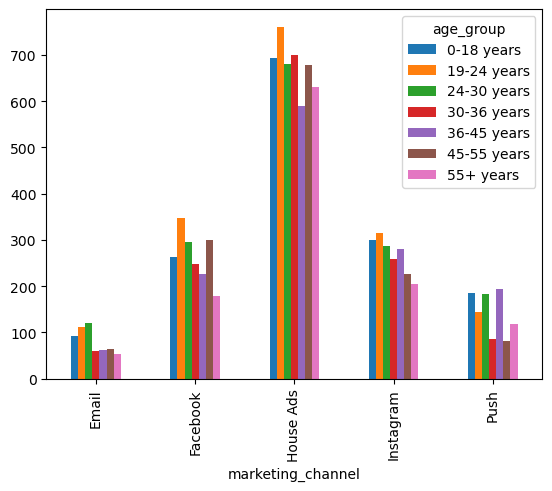

In [62]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

print(channel_age.info())

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

### 2) Whose channel had the best retention rate from the campaign?

In [76]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head())

# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))


date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64
date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


NameError: name 'plt' is not defined

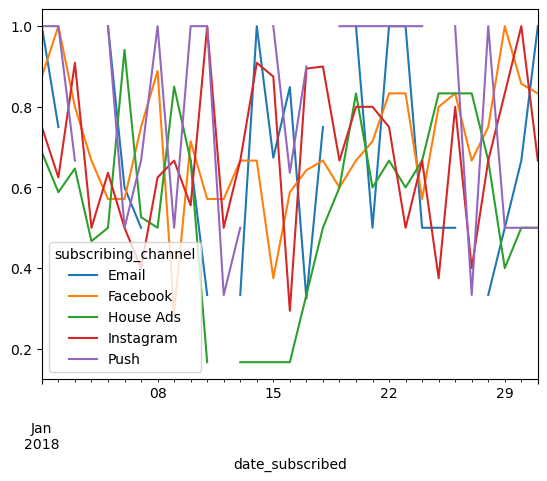

In [65]:

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

# Problem solve - House ads

The house ads team has become worried about some irregularities they've noticed in conversion rate. 

### 1) Building functions

#### (1) Conversion function

In [77]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

#### (2) Plotting function

In [ ]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

### 2) House ads conversion rate

#### (1) For all channel

In [78]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


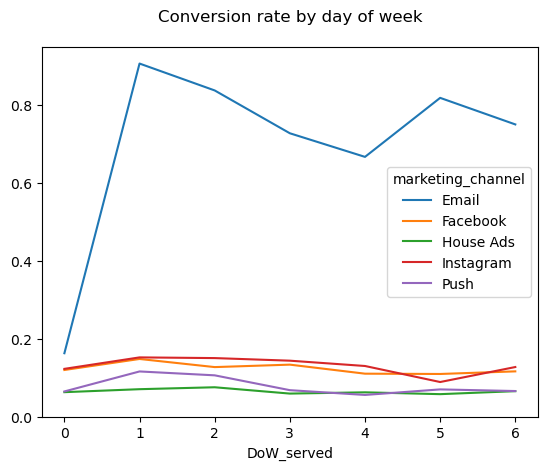

In [79]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

#### (2) Only for House Ads

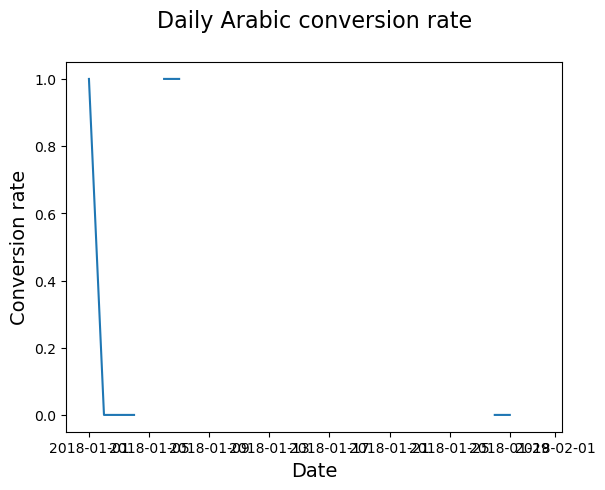

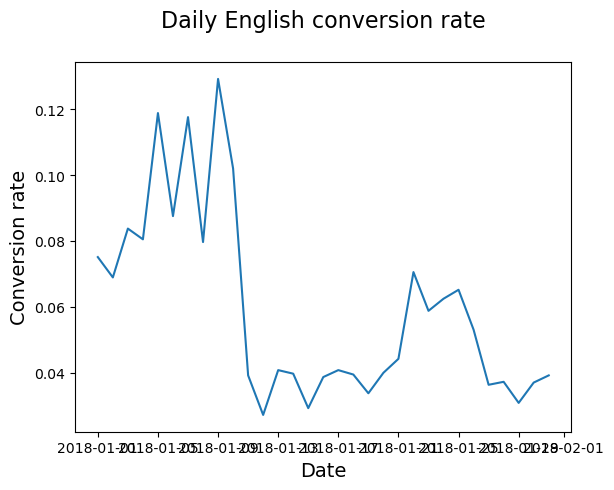

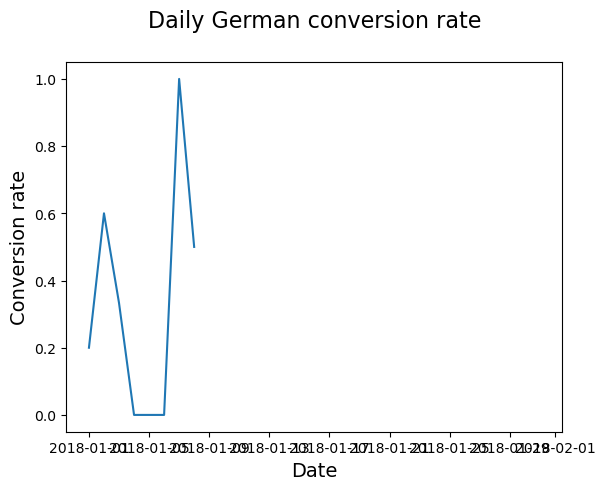

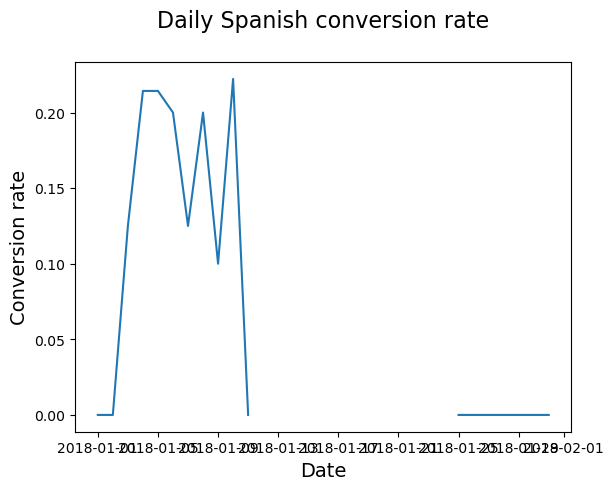

<Figure size 640x480 with 0 Axes>

In [81]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results
plotting_conv(conv_lang_df)

#### (3) Explore the language problem

What percentage of users were not being served ads in the right language
- language is, in fact, the issue with House Ads conversion

C:\Users\11468\AppData\Local\Temp\ipykernel_12012\3354706238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


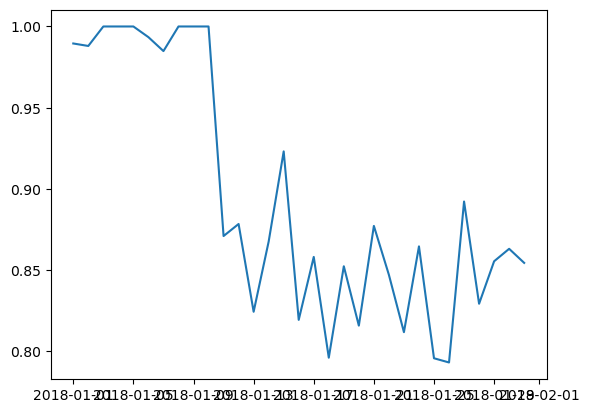

In [83]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

- Estimate what daily conversion rates should have been if users were being served the correct language

In [90]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [104]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

print(converted.head())
print(converted.info())

converted = converted_df

                                user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 119 entries, (Timestamp('2018-01-01 00:00:00'), 'Arabic') to (Timestamp('2018-01-31 00:00:00'), 'Spanish')
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    119 non-null    int64 
 1   converted  119 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB
None


In [105]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted_df[('user_id','German')]

- Calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language.

In [106]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


# A/B testing in email campaign

## 1. Comparing conversion rate

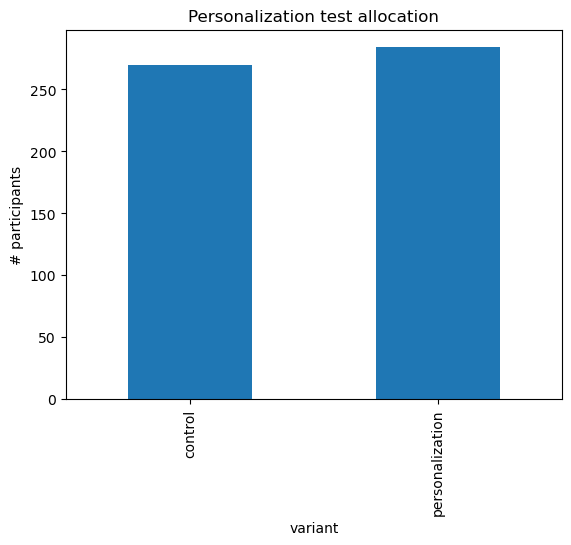

In [109]:
email = marketing[marketing['marketing_channel']=="Email"]
alloc = email.groupby(['variant'])['user_id'].nunique()
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [110]:
subscribers = email.groupby(['user_id','variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

In [111]:
control = subscribers_df['control'].dropna()
print('Control conversion rate:', np.mean(control))

Control conversion rate: 0.2814814814814815


In [112]:
personalization = subscribers_df['personalization'].dropna()
print('Personalization conversion rate:', np.mean(personalization))

Personalization conversion rate: 0.3908450704225352


## 2. Testing lift & significance 

In [129]:
import numpy as np
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

In [130]:
print(lift(control, personalization))

38.85%


In [134]:
type(control)
type(personalization)

numpy.ndarray

In [136]:
control = control.astype(int)
personalization = personalization.astype(int)

In [137]:
from scipy.stats import ttest_ind
ttest_ind(control,personalization)

Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182)

## 3. A/B testing segmenting

In [151]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      control = control.astype(int)
      personalization = personalization.astype(int)
      print('t-statistic:', ttest_ind(control, personalization), '\n\n')

### 1) Language

In [152]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.19100834180787182, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




C:\Users\11468\AppData\Local\Temp\ipykernel_12012\427907835.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print('t-statistic:', ttest_ind(control, personalization), '\n\n')


## 2) Age

In [153]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142212, pvalue=0.003872449439129706) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.0317943847866697, pvalue=0.0030623836114689195) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.185906464414798, pvalue=0.0023238487431765337) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.431790127931851, pvalue=0.017975686009788255) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.0654991273179326, pvalue=0.04306233968820123) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.326565456420339, pvalue=0.0016358623456360468) 


